# Classificação de imagem

O MNIST (site em inglês) é um conjunto de imagens de números escritos à mão, e o seu nome significa literalmente que é um dataset Modificado do Instituto Nacional de Padrões e Tecnologia (em inglês Modified National Institute of Standards and Technology database). E por que modificado? Porque já havia um dataset chamado NIST (do Instituto Nacional de Padrões e Tecnologia) que tinha sido formado por imagens de números escritos à mão coletados de um escritório norte americano responsável pelo censo e também de estudantes do colegial.

## Leitura de Dados

In [125]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten,Dropout

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage

sns.set_style('darkgrid')

In [4]:
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

In [7]:
len(imagens_treino), len(imagens_teste)

(60000, 10000)

In [8]:
imagens_treino.shape, imagens_teste.shape

((60000, 28, 28), (10000, 28, 28))

O primeiro número indica que temos 60 000 imagens, o segundo que são compostas de 28 linhas e o terceiro que elas são compostas de 28 colunas.

In [21]:
identificacoes_treino.min(), identificacoes_treino.max()

(0, 9)

In [43]:
total_classes = 10
nome_classes = ['Tshirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle_boot']

## Visualizar Imagens

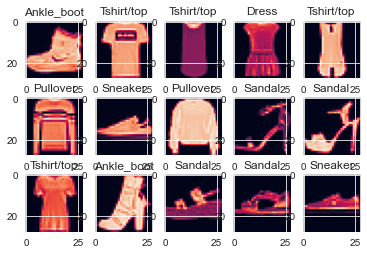

In [49]:
n = 15
for imagem in range(n):
    plt.subplot(3,5,imagem+1)
    plt.title(nome_classes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem])
    

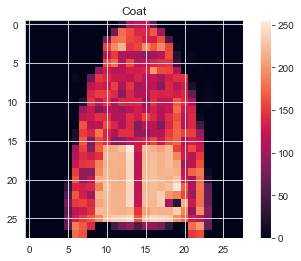

In [77]:
plt.title(nome_classes[identificacoes_treino[22]])
plt.imshow(imagens_treino[22])
plt.colorbar()

## Construir Modelo

Dados uma imagem de 2 x 2px, estamos tendo uma imagem de 2 dimensões, linhas e colunas. 

O que podemos fazer nesta primeira camada, que chamamos de camada 0, é pegar esses 2 x 2px e, por exemplo, ter uma função para lidar com cada pixel. Então, teríamos 4 unidades, 1 para cada pixel, e o que elas farão é reordenar e reagrupar estes pixels. Então, em vez de termos 2 dimensões, 2 linhas e 2 colunas, teremos 1 linha e 4 colunas, assim temos 1 dimensão com 4 pixels.

É isso que faremos em nossa primeira camada, que é a que chamamos de camada 0. 

In [133]:
def build_model(input_shape,X_treino,y_treino):
    
    #sequencia [entrada, processamento, saida]
    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(256,activation=tensorflow.nn.relu)) #camada totalmente conecatada
    model.add(Dropout(0.2))
    model.add(Dense(128,activation=tensorflow.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation=tensorflow.nn.relu))
    model.add(Dense(10,activation=tensorflow.nn.softmax)) #camada de saida, mesma quantidade de nºs da classe
    
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy']
                 )
    model.summary()
    
    historico = model.fit(X_treino,
              y_treino, 
              epochs=5,
             validation_split=0.2)
    
    return model, historico

In [134]:
input_shape = (28,28)

# normalização
imagens_treino_scaled = imagens_treino/float(255)

model, historico = build_model(input_shape,imagens_treino_scaled,identificacoes_treino)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_61 (Dense)             (None, 10)              

## Avaliando Modelo

In [135]:
testes = model.predict(imagens_teste)

In [136]:
#resultado teste
print("Resultado teste: ",np.argmax(testes[0]))
print("Numero da imagem de teste: ", identificacoes_teste[0])

Resultado teste:  9
Numero da imagem de teste:  9


In [137]:
# Primeira posição é a perda do teste e a segunda a acuracia
model.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 2s 3ms/step - loss: 46.1977 - accuracy: 0.8436


[46.19774627685547, 0.8435999751091003]

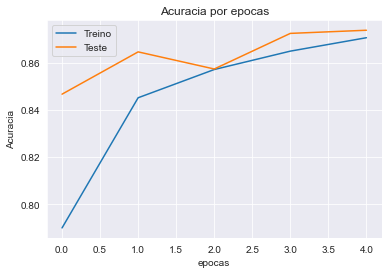

In [138]:
plt.title("Acuracia por epocas")
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.xlabel('epocas')
plt.ylabel('Acuracia')
plt.legend(['Treino','Teste'])
plt.show()

Sinais de overffiting no treinamento

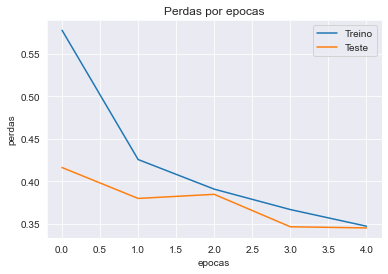

In [139]:
plt.title("Perdas por epocas")
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['Treino','Teste'])
plt.show()

## Salvando modelo

In [142]:
from tensorflow.keras.models import load_model

In [141]:
model.save('modelo.h5')

In [143]:
saved_model = load_model('modelo.h5')

In [145]:
teste_saved_model = saved_model.predict(imagens_teste)
print('Resultado do modelo salvo',np.argmax(teste_saved_model[1]))
print('Resultado imagem teste',identificacoes_teste[1])

Resultado do modelo salvo 2
Resultado imagem teste 2
